In [1]:
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.applications.mobilenet import MobileNet, preprocess_input
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
img_width = 180
img_height = 180

IMAGE_SIZE = [227, 227]

model = model =tf.keras.applications.MobileNet(input_shape= [227,227, 3], weights='imagenet', include_top=False)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 114, 114, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 114, 114, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 114, 114, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 114, 114, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 114, 114, 32)      0     

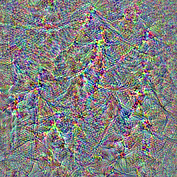

Processing filter 0


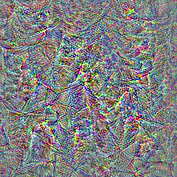

Processing filter 1


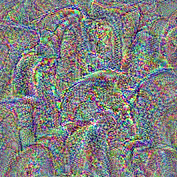

Processing filter 2


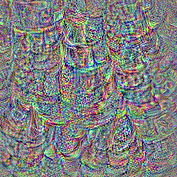

Processing filter 3


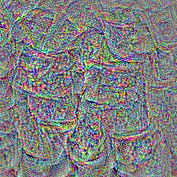

Processing filter 4


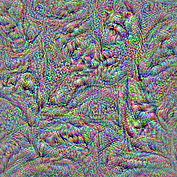

Processing filter 5


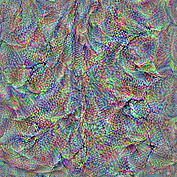

Processing filter 6


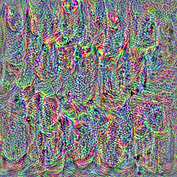

Processing filter 7


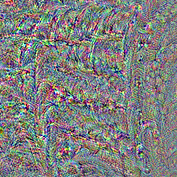

Processing filter 8


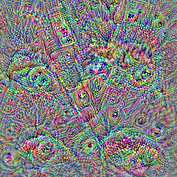

Processing filter 9


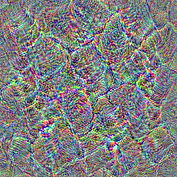

Processing filter 10


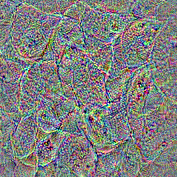

Processing filter 11


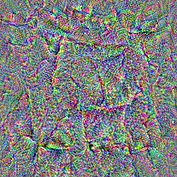

Processing filter 12


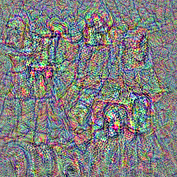

Processing filter 13


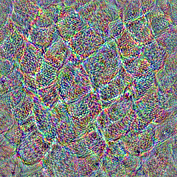

Processing filter 14


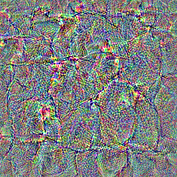

Processing filter 15


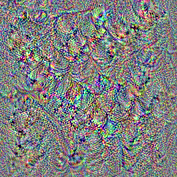

Processing filter 16


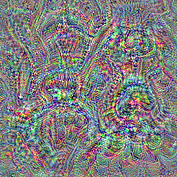

Processing filter 17


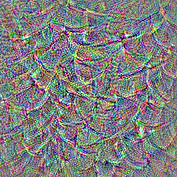

Processing filter 18


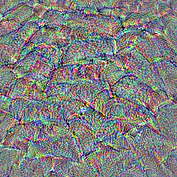

Processing filter 19


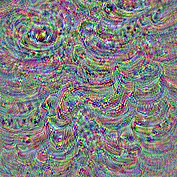

Processing filter 20


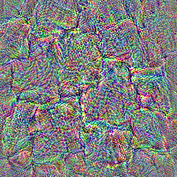

Processing filter 21


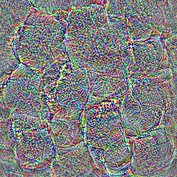

Processing filter 22


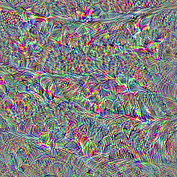

Processing filter 23


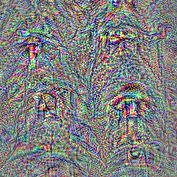

Processing filter 24


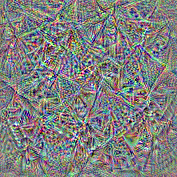

Processing filter 25


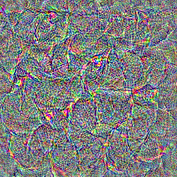

Processing filter 26


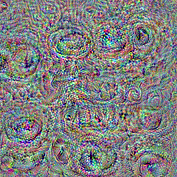

Processing filter 27


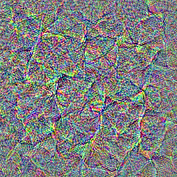

Processing filter 28


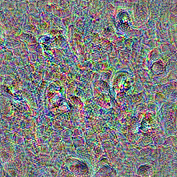

Processing filter 29


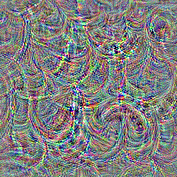

Processing filter 30


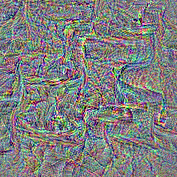

Processing filter 31


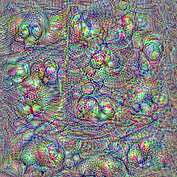

Processing filter 32


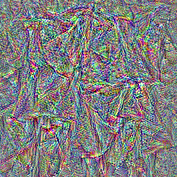

Processing filter 33


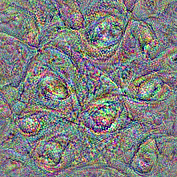

Processing filter 34


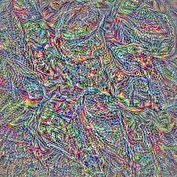

Processing filter 35


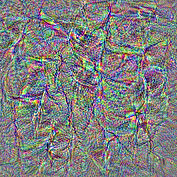

Processing filter 36


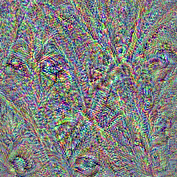

Processing filter 37


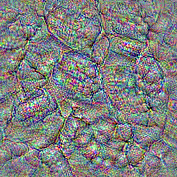

Processing filter 38


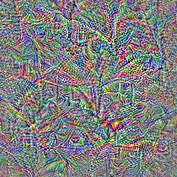

Processing filter 39


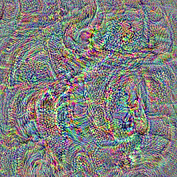

Processing filter 40


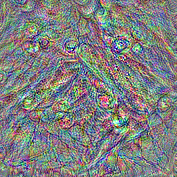

Processing filter 41


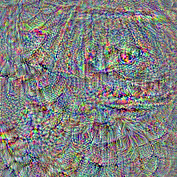

Processing filter 42


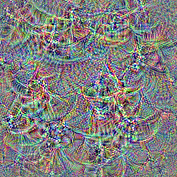

Processing filter 43


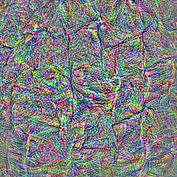

Processing filter 44


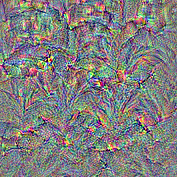

Processing filter 45


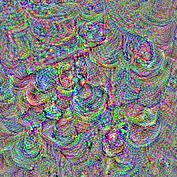

Processing filter 46


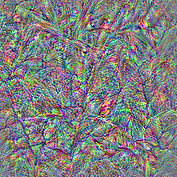

Processing filter 47


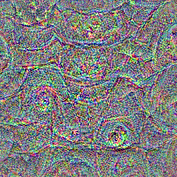

Processing filter 48


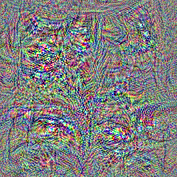

Processing filter 49


KeyboardInterrupt: 

In [2]:
layer = model.get_layer(name='conv_pw_12_relu')
feature_extractor = tf.keras.Model(inputs=model.inputs, outputs=layer.output)


def compute_loss(input_image, filter_index):
    activation = feature_extractor(input_image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)




@tf.function
def gradient_ascent_step(img, filter_index, learning_rate):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index)
    grads = tape.gradient(loss, img)
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img

def initialize_image():
    img = tf.random.uniform((1, 227, 227, 3))
    return (img - 0.5) * 0.25


def visualize_filter(filter_index):
    # We run gradient ascent for 20 steps
    iterations = 30
    learning_rate = 10.0
    img = initialize_image()
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img


def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # Center crop
    img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img

from IPython.display import Image, display

loss, img = visualize_filter(0)
tf.keras.preprocessing.image.save_img("0.png", img)



display(Image("0.png"))


all_imgs = []
for filter_index in range(64):
    print("Processing filter %d" % (filter_index,))
    loss, img = visualize_filter(filter_index)
    string = str(filter_index) +  ".png"
    tf.keras.preprocessing.image.save_img(string, img)
    display(Image(string))

